# Task Switching

In [1]:
# Uncomment the following line when running on Google Colab
# !pip install "autora"

The task switching experiment has to be initialized with a specific formula and effects.

In [2]:
import numpy as np
from autora.experiment_runner.synthetic.neuroscience.task_switching import task_switching

s = task_switching()

Check the docstring to get information about the model

In [3]:
help(task_switching)

Help on function task_switching in module autora.experiment_runner.synthetic.neuroscience.task_switching:

task_switching(name='Task Switching', resolution=50, priming_default=0.3, temperature=0.2, minimum_task_control=0.15, constant=1.5)
    Task Switching
    
    Args:
        name: name of the experiment
        resolution: number of allowed values for stimulus
        priming_default: default for task priming
        temperature: temperature for softmax when computing performance of current task
        constant: constant for task activation
        minimum_task_control: minimum task control
    Examples:
        >>> s = task_switching()
        >>> s.run(np.array([[.5,.7,0]]), random_state=42)
           cur_task_strength  alt_task_strength  is_switch  cur_task_performance
        0                0.5                0.7        0.0              0.685351



... or use the describe function:

In [4]:
from autora.experiment_runner.synthetic.utilities import describe

print(describe(s))


    Task Switching

    Args:
        name: name of the experiment
        resolution: number of allowed values for stimulus
        priming_default: default for task priming
        temperature: temperature for softmax when computing performance of current task
        constant: constant for task activation
        minimum_task_control: minimum task control
    Examples:
        >>> s = task_switching()
        >>> s.run(np.array([[.5,.7,0]]), random_state=42)
           cur_task_strength  alt_task_strength  is_switch  cur_task_performance
        0                0.5                0.7        0.0              0.685351
    


The synthetic experiement `s` has properties like the name of the experiment:

In [5]:
s.name

'Task Switching'

... a valid variables description:

In [6]:
s.variables

VariableCollection(independent_variables=[IV(name='cur_task_strength', value_range=(0, 1), allowed_values=array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]), units='intensity', type=<ValueType.REAL: 'real'>, variable_label='Strength of Current Task', rescale=1, is_covariate=False), IV(name='alt_task_strength', value_range=(0, 1), allowed_values=array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]), units='intensity', type=<ValueT

... now we can generate the full domain of the data

In [7]:
x = s.domain()
x

array([[0.02, 0.02, 0.  ],
       [0.02, 0.04, 0.  ],
       [0.02, 0.06, 0.  ],
       ...,
       [1.  , 0.96, 1.  ],
       [1.  , 0.98, 1.  ],
       [1.  , 1.  , 1.  ]])

... the experiment_runner which can be called to generate experimental results:

In [8]:
experiment_data = s.run(x)
experiment_data

,cur_task_strength,alt_task_strength,is_switch,cur_task_performance
0,0.02,0.02,0.0,0.922331
1,0.02,0.04,0.0,0.901138
2,0.02,0.06,0.0,0.887451
3,0.02,0.08,0.0,0.869731
4,0.02,0.10,0.0,0.860710
...,...,...,...,...
4995,1.00,0.92,1.0,0.536209
4996,1.00,0.94,1.0,0.531290
4997,1.00,0.96,1.0,0.533204
4998,1.00,0.98,1.0,0.519257


... a function to plot the ground truth (no noise):

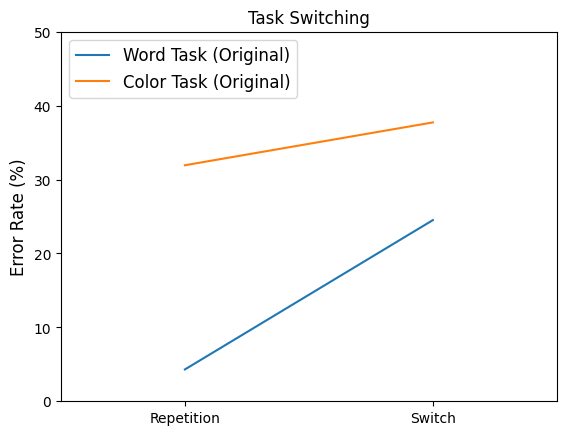

In [9]:
s.plotter()

... against a fitted model if it exists:

/Users/younesstrittmatter/Documents/GitHub/AutoRA/autora-synthetic/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


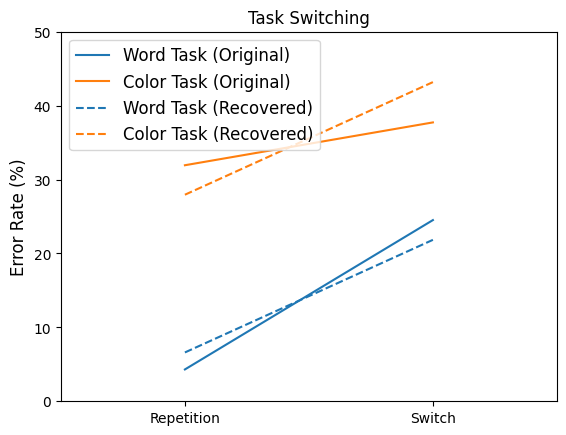

In [10]:
from sklearn.linear_model import LinearRegression
ivs = [iv.name for iv in s.variables.independent_variables]
dvs = [dv.name for dv in s.variables.dependent_variables]
X = experiment_data[ivs]
y = experiment_data[dvs]
model = LinearRegression().fit(X, y)
s.plotter(model)

We can wrap this functions to use with the state logic of AutoRA:
First, we create the state with the variables:

In [11]:
from autora.state import StandardState, on_state, experiment_runner_on_state, estimator_on_state
from autora.experimentalist.grid import grid_pool
from autora.experimentalist.random import random_sample

# We can get the variables from the runner
variables = s.variables

# With the variables, we initialize a StandardState
state = StandardState(variables)

Wrap the experimentalists in `on_state` function to use them on state:

In [12]:
# Wrap the functions to use on state
# Experimentalists:
pool_on_state = on_state(grid_pool, output=['conditions'])
sample_on_state = on_state(random_sample, output=['conditions'])

state = pool_on_state(state)
state = sample_on_state(state, num_samples=2)
print(state.conditions)

      cur_task_strength  alt_task_strength  is_switch
4326               0.88               0.28          0
621                0.14               0.22          1


Wrap the runner with the `experiment_runner_on_state` wrapper to use it on state:

In [13]:
# Runner:
run_on_state = experiment_runner_on_state(s.run)
state = run_on_state(state)

state.experiment_data

,cur_task_strength,alt_task_strength,is_switch,cur_task_performance
4326,0.88,0.28,0,0.931829
621,0.14,0.22,1,0.714810


Wrap the regressor with the `estimator_on_state` wrapper:

In [16]:
theorist = LinearRegression()
theorist_on_state = estimator_on_state(theorist)

state = theorist_on_state(state)
# Access the last model:
model = state.models[-1]


print(f"rt = "
      f"{model.coef_[0][0]:.2f}*cur_task_strength "
      f"{model.coef_[0][1]:.2f}*alt_task_strength "
      f"{model.coef_[0][2]:.2f}*is_switch "
      f"{model.intercept_[0]:+.2f} ")

rt = 0.10*cur_task_strength 0.01*alt_task_strength -0.14*is_switch +0.84 
